In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def create_model(hidden_units, activation_func):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
    for units in hidden_units:
        model.add(layers.Dense(units, activation=activation_func))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


In [39]:
hidden_units_configs = [[10], [15], [10,15], [15,10]]
activation_funcs = ['relu', 'sigmoid', 'tanh']
results = []
for units_config in hidden_units_configs:
    for activation_func in activation_funcs:
        model = create_model(units_config, activation_func)
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
        _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        results.append((units_config, activation_func, test_accuracy))
        print(f"Units config: {units_config}, Activation function: {activation_func}, Test accuracy: {test_accuracy}")

Units config: [10], Activation function: relu, Test accuracy: 0.875
Units config: [10], Activation function: sigmoid, Test accuracy: 0.8349999785423279
Units config: [10], Activation function: tanh, Test accuracy: 0.8450000286102295
Units config: [15], Activation function: relu, Test accuracy: 0.8849999904632568
Units config: [15], Activation function: sigmoid, Test accuracy: 0.8299999833106995
Units config: [15], Activation function: tanh, Test accuracy: 0.8399999737739563
Units config: [10, 15], Activation function: relu, Test accuracy: 0.9049999713897705
Units config: [10, 15], Activation function: sigmoid, Test accuracy: 0.8450000286102295
Units config: [10, 15], Activation function: tanh, Test accuracy: 0.8799999952316284
Units config: [15, 10], Activation function: relu, Test accuracy: 0.8849999904632568
Units config: [15, 10], Activation function: sigmoid, Test accuracy: 0.8349999785423279
Units config: [15, 10], Activation function: tanh, Test accuracy: 0.8700000047683716


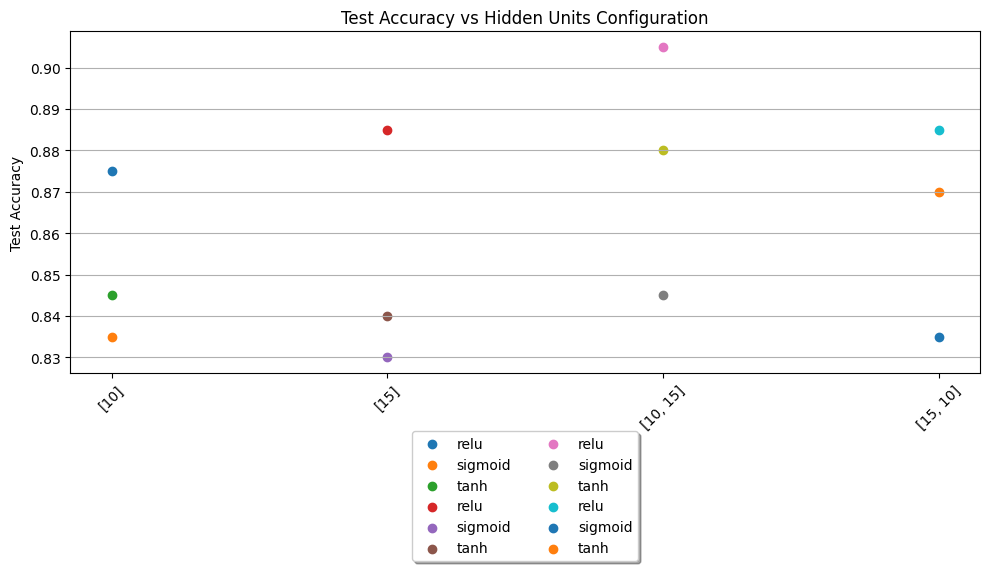

In [40]:
plt.figure(figsize=(10, 6))
for units_config, activation_func, test_accuracy in results:
    plt.scatter(str(units_config), test_accuracy, label=f"{activation_func}")
plt.xlabel('Hidden Units Configuration')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Hidden Units Configuration')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()